# Gender Classification using DecisionTreeClassifier 

## Introduction

**Description:** 
Using DecisionTreeClassifier in sci-kit learn to predict gender based on certain features

**Data:** https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

**Tools:**
```python
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score
```


## Procedure
### 1. Import the data format it into pandas dataframe

In [24]:
import kagglehub
import os


# Download latest version
path = kagglehub.dataset_download("elakiricoder/gender-classification-dataset")

for file in os.listdir(path):
    print(file)

gender_classification_v7.csv


In [25]:
import pandas as pd

csv_path = os.path.join(path, "gender_classification_v7.csv")

gend_full = pd.read_csv(csv_path)
print(gend_full.head())

   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female  


### 2. Use data to build a DecisionTreeClassifier

In [26]:
## Split DataFrame into features and target

# Features
x = gend_full.loc[:, "long_hair":"distance_nose_to_lip_long"]
# Target
y = gend_full["gender"]

In [27]:
## Split into train_test_split
from sklearn.model_selection import train_test_split

#random state seed for pseudorandomness
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0) 

In [28]:
## Build the DecisionTreeClassifier to classify gender
from sklearn.tree import DecisionTreeClassifier

# Train the tree with the data
# A random max_depth is chosen now
clf = DecisionTreeClassifier(max_depth=3)

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

### 3. Testing the tree with accuracy score

In [29]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9546968687541639


### 4. Extra: Trying to find an optimal max depth of tree

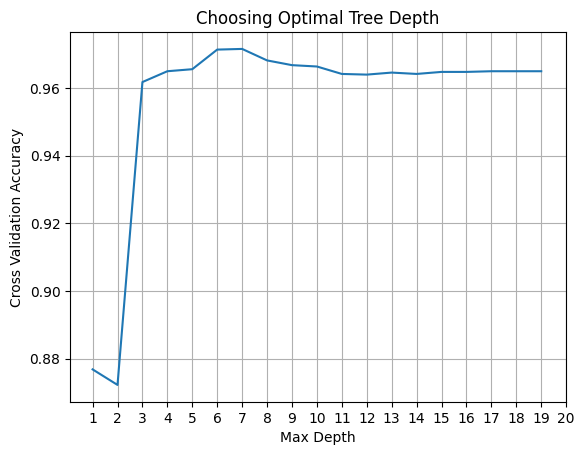

In [36]:
## Using cross-validation to find the best depth - multiple split of data
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

depths = range(1,20)
scores = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    cv_scores = cross_val_score(clf,x,y, cv=5)
    scores.append(np.mean(cv_scores))
    
plt.plot(depths, scores)
plt.xlabel("Max Depth")
plt.xticks(range(1,21))
plt.ylabel("Cross Validation Accuracy")
plt.title("Choosing Optimal Tree Depth")
plt.grid(True)
plt.show()
    


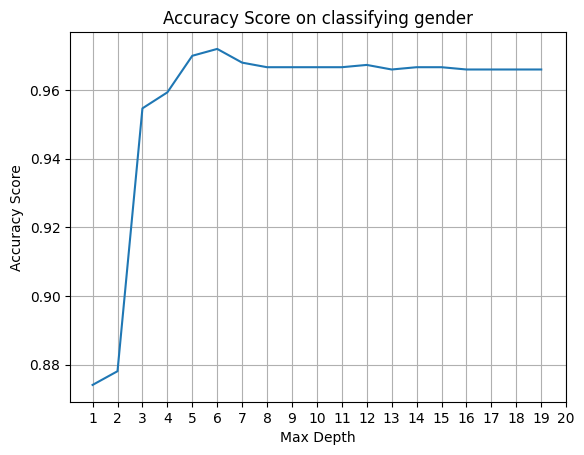

In [42]:
## Now we pick the max depth = 7, and trying to test is it actually the best depth

def accuracy_score_graph(x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test):
    depths = range(1,20)
    accuracy = []
    
    for d in depths:
        clf = DecisionTreeClassifier(max_depth=d, random_state=0)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        score = accuracy_score(y_pred, y_test)
        accuracy.append(score)
        
    plt.plot(depths, accuracy)
    plt.xlabel("Max Depth")
    plt.xticks(range(1,21))
    plt.ylabel("Accuracy Score")
    plt.grid(True)
    plt.title("Accuracy Score on classifying gender")
    
    plt.show()
    
accuracy_score_graph()
    
    

## 5. Conclusion
The Cross-Validation Score with cv=5 (5 folds on data) shows an optimal depth at depth = 5, which aligns with the result of Accuracy Score on the train_test_split data with test_size=0.3, resulting with an optimal depth at depth=6